# Accelerometer calibration

In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
lock_meas  = '..\\..\\DATA\\RAW\\Measure_04' # Location folder of the measurement files
stand_date = '2018_ 11_ 27_9_39_00_'                 # Use this file to calibrate ACCELERO

acc_calib = pd.read_csv(lock_meas + '\\StandStill\\' + stand_date + 'IMU.txt',
                               sep='\t',
                               decimal=',',
                               names=['time', 'acc0', 'acc1', 'acc2', 'gyro0', 'gyro1', 'gyro2', 'mag0', 'mag1', 'mag2'])

# Delete invalid measurements
acc_calib = acc_calib[~(acc_calib[['acc0','acc1','acc2']] == 0).any(axis=1)]
# Make array from data frame
acc_ar = np.array(acc_calib)

# Create a look up table to see the code more clearly
time=0
acc0=1
acc1=2
acc2=3

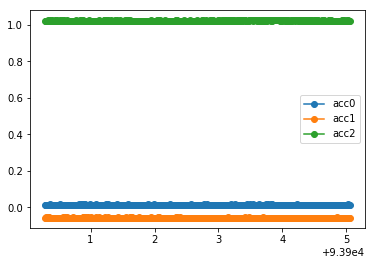

In [29]:
# Plotting the raw data. Without calibration
plt.plot(acc_ar[:,time], acc_ar[:,acc0], 'o', linestyle="-", label="acc0")
plt.plot(acc_ar[:,time], acc_ar[:,acc1], 'o', linestyle="-", label="acc1")
plt.plot(acc_ar[:,time], acc_ar[:,acc2], 'o', linestyle="-", label="acc2")
plt.legend()
plt.show()

In [30]:
acc0_mean = np.mean(acc_ar[:,acc0])
acc1_mean = np.mean(acc_ar[:,acc1])
acc2_mean = np.mean(acc_ar[:,acc2])

for i in range(acc_ar.shape[0]):
    acc_ar[i, acc0] = acc_ar[i, acc0] - acc0_mean
    acc_ar[i, acc1] = acc_ar[i, acc1] - acc1_mean
    acc_ar[i, acc2] = acc_ar[i, acc2] - acc2_mean

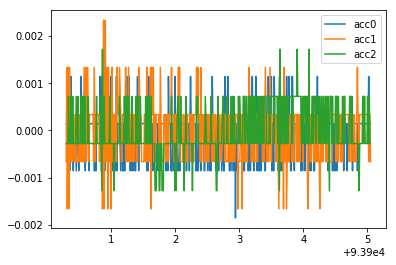

In [31]:
# Plotting the filtered and offsetted data
plt.plot(acc_ar[:,time], acc_ar[:,acc0], ' ', linestyle="-", label="acc0")
plt.plot(acc_ar[:,time], acc_ar[:,acc1], ' ', linestyle="-", label="acc1")
plt.plot(acc_ar[:,time], acc_ar[:,acc2], ' ', linestyle="-", label="acc2")
plt.legend()
plt.show()

In [34]:
acc_calib.head(2)

,time,acc0,acc1,acc2,gyro0,gyro1,gyro2,mag0,mag1,mag2
0,93900.2928,0.015,-0.057,1.023,-0.665,0.222,-0.040,-0.324,-0.303,0.045
1,93900.3018,0.015,-0.055,1.023,-0.524,-0.081,-0.336,0.000,0.000,0.000


In [37]:
acc_calib2 = pd.DataFrame(acc_ar, columns=acc_calib.columns)

In [38]:
acc_calib2.head(2)

,time,acc0,acc1,acc2,gyro0,gyro1,gyro2,mag0,mag1,mag2
0,93900.2928,0.000145,-0.000663,-0.000278,-0.665,0.222,-0.040,-0.324,-0.303,0.045
1,93900.3018,0.000145,0.001337,-0.000278,-0.524,-0.081,-0.336,0.000,0.000,0.000
